In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import sys
sys.path.append('../../../optimal-signal-demixing/')
from osd import Problem
from osd.components import (
    MeanSquareSmall, 
    AsymmetricNoise,
    ConstantChunks,
    LinearTrend
)
from osd.components.wrappers import make_columns_equal

In [11]:
T = 100
p = 3
X1 = .15 * np.random.randn(T, p)
use_set = np.random.uniform(size=(T, p)) >= 0.2
use_set[45:50] = False

# Linear (no constraint)

In [8]:
Xlt = np.tile(np.linspace(-0.5, 1.3, T), (p, 1)).T

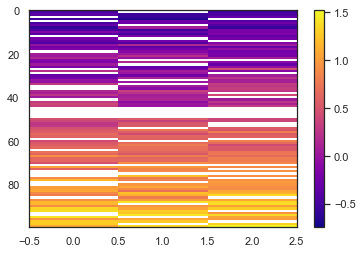

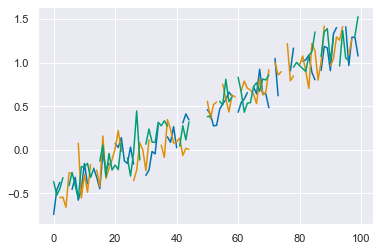

In [20]:
y1 = X1 + Xlt
y1[~use_set] = np.nan
with sns.axes_style('white'):
    plt.imshow(y1, aspect='auto', interpolation='none', cmap='plasma')
    plt.colorbar()
    plt.show()
plt.plot(y1)
plt.show()
c1 = [
    MeanSquareSmall(size=T*p),
    make_columns_equal(LinearTrend)
]
p1 = Problem(y1, c1)

In [23]:
p1.decompose(how='cvx', reset=True)

                                     CVXPY                                     
                                    v1.1.18                                    
(CVXPY) Jan 27 02:27:30 PM: Your problem has 600 variables, 3 constraints, and 2 parameters.
(CVXPY) Jan 27 02:27:30 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 27 02:27:30 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Jan 27 02:27:30 PM: Compiling problem (target solver=OSQP).
(CVXPY) Jan 27 02:27:30 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) Jan 27 02:27:30 PM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 27 02:27:30 PM: Applying reduction Qp2SymbolicQp

In [25]:
p1.objective_value

0.01868756188613574

In [26]:
p1.problem.value

0.018687561886135733

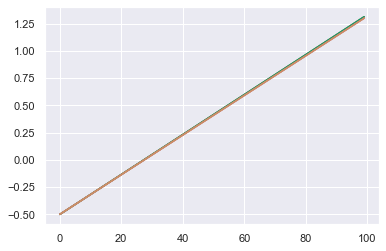

In [17]:
plt.plot(p1.estimates[1])
plt.plot(Xlt)

In [27]:
p1.decompose(how='admm', reset=True)

[====================] ...3 iterations, 0.01 sec -- obj_val: 2.23e-02, r: 4.77e-18, tol: 1.02e-05      



In [28]:
p1.objective_value

0.022325159851018656

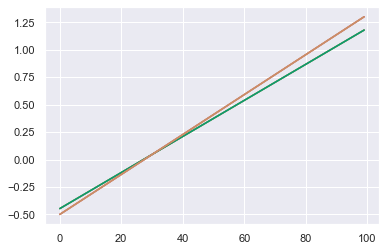

In [29]:
plt.plot(p1.estimates[1])
plt.plot(Xlt)

In [30]:
p1.decompose(how='bcd', reset=True)

Starting BCD...
y shape: (100, 3)
X shape: (2, 100, 3)

[====================] ...2 iterations, 0.00 sec -- obj_val: 1.87e-02, r: 1.68e-18, tol: 1.02e-05      



In [31]:
p1.objective_value

0.018690373920977863

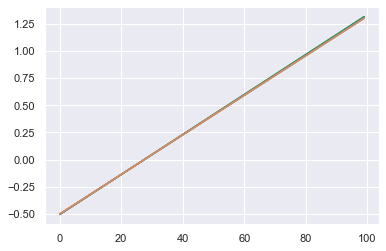

In [32]:
plt.plot(p1.estimates[1])
plt.plot(Xlt)

# Linear with first value constraint

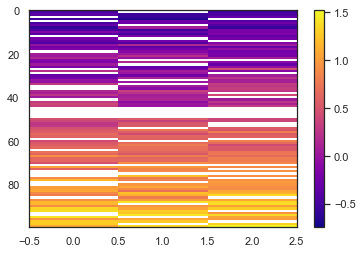

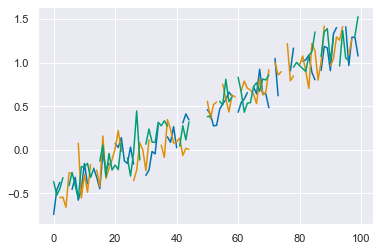

In [33]:
y1 = X1 + Xlt
y1[~use_set] = np.nan
with sns.axes_style('white'):
    plt.imshow(y1, aspect='auto', interpolation='none', cmap='plasma')
    plt.colorbar()
    plt.show()
plt.plot(y1)
plt.show()
c1 = [
    MeanSquareSmall(size=T*p),
    make_columns_equal(LinearTrend)(first_val=-0.5)
]
p1 = Problem(y1, c1)

In [34]:
p1.decompose(how='cvx', reset=True)

                                     CVXPY                                     
                                    v1.1.18                                    
(CVXPY) Jan 27 02:29:39 PM: Your problem has 600 variables, 4 constraints, and 2 parameters.
(CVXPY) Jan 27 02:29:39 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 27 02:29:39 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Jan 27 02:29:39 PM: Compiling problem (target solver=OSQP).
(CVXPY) Jan 27 02:29:39 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) Jan 27 02:29:39 PM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 27 02:29:39 PM: Applying reduction Qp2SymbolicQp

In [35]:
p1.objective_value

0.01868763731436364

In [36]:
p1.problem.value

0.018687637314363636

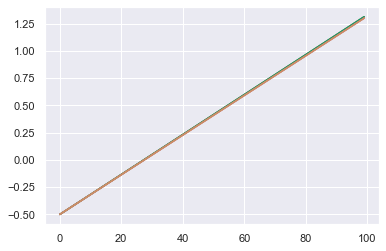

In [37]:
plt.plot(p1.estimates[1])
plt.plot(Xlt)

In [38]:
p1.decompose(how='admm', reset=True)

[====================] ...44 iterations, 0.10 sec -- obj_val: 1.87e-02, r: 5.69e-06, tol: 1.02e-05      



In [39]:
p1.objective_value

0.01868764084958716

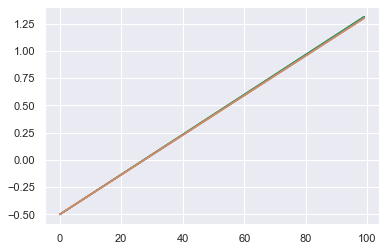

In [40]:
plt.plot(p1.estimates[1])
plt.plot(Xlt)

In [41]:
p1.decompose(how='bcd', reset=True)

Starting BCD...
y shape: (100, 3)
X shape: (2, 100, 3)

[====================] ...2 iterations, 0.00 sec -- obj_val: 1.87e-02, r: 1.65e-18, tol: 1.02e-05      



In [42]:
p1.objective_value

0.018688082948941143

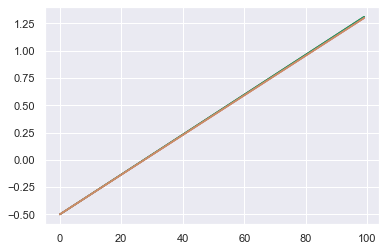

In [43]:
plt.plot(p1.estimates[1])
plt.plot(Xlt)

# Asymmetric noice

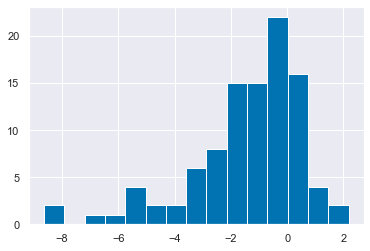

In [78]:
from scipy.stats import laplace_asymmetric
kappa = 2
np.random.seed(110100100)
al = laplace_asymmetric.rvs(kappa, size=T)
Xan = np.tile(al, (p, 1)).T
plt.hist(al, bins=15);

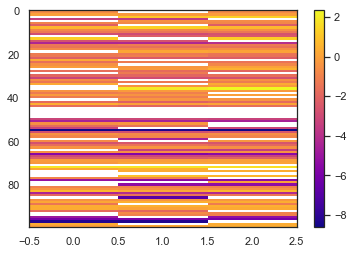

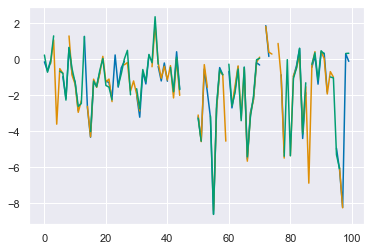

In [79]:
y2 = X1 + Xan
y2[~use_set] = np.nan
with sns.axes_style('white'):
    plt.imshow(y2, aspect='auto', interpolation='none', cmap='plasma')
    plt.colorbar()
    plt.show()
plt.plot(y2)
plt.show()
c2 = [
    MeanSquareSmall(size=T*p),
    make_columns_equal(AsymmetricNoise)(weight=1/(T*p), tau=0.8)
]
p2 = Problem(y2, c2)

In [80]:
p2.decompose(how='cvx', reset=True)

                                     CVXPY                                     
                                    v1.1.18                                    
(CVXPY) Jan 27 02:47:16 PM: Your problem has 600 variables, 2 constraints, and 3 parameters.
(CVXPY) Jan 27 02:47:16 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 27 02:47:16 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Jan 27 02:47:16 PM: Compiling problem (target solver=OSQP).
(CVXPY) Jan 27 02:47:16 PM: Reduction chain: EvalParams -> CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) Jan 27 02:47:16 PM: Applying reduction EvalParams
(CVXPY) Jan 27 02:47:16 PM: Applying reduction Cvx

/Users/bennetmeyers/miniconda3/envs/pvi-dev/lib/python3.7/site-packages/cvxpy/reductions/solvers/solving_chain.py:167: UserWarning: You are solving a parameterized problem that is not DPP. Because the problem is not DPP, subsequent solves will not be faster than the first one. For more information, see the documentation on Discplined Parametrized Programming, at
	https://www.cvxpy.org/tutorial/advanced/index.html#disciplined-parametrized-programming
  warnings.warn(dpp_error_msg)


In [81]:
p2.objective_value

0.13639444175254573

In [82]:
p2.problem.objective.value

0.13639444175254573

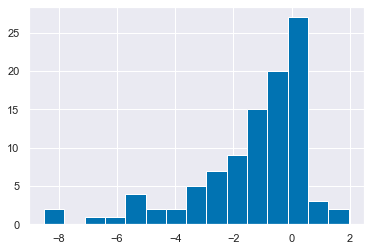

In [83]:
plt.hist(p2.estimates[1,:, 0], bins=15);

In [96]:
p2.decompose(how='admm', reset=True)

[====================] ...3 iterations, 0.01 sec -- obj_val: 3.03e-01, r: 2.61e-17, tol: 1.05e-05      



In [97]:
p2.objective_value

0.3031233710210641

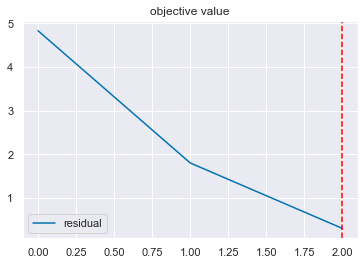

In [102]:
plt.figure()
plt.plot(p2.admm_result['obj_vals'], label='residual')
plt.axvline(p2.admm_result['it'], color='red', ls='--')
# plt.yscale('log')
plt.legend()
plt.title('objective value')
plt.show()

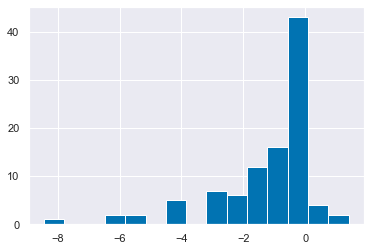

In [92]:
plt.hist(p2.estimates[1,:, 0], bins=15);

In [93]:
p2.decompose(how='bcd', reset=True)

Starting BCD...
y shape: (100, 3)
X shape: (2, 100, 3)

[====================] ...2 iterations, 0.00 sec -- obj_val: 1.43e-01, r: 1.85e-18, tol: 1.02e-05      



In [94]:
p2.objective_value

0.14334175799393095

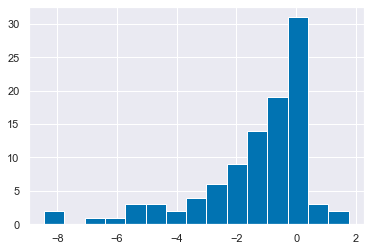

In [95]:
plt.hist(p2.estimates[1,:, 0], bins=15);

# Constant chunks

In [122]:
np.random.seed(110100100)
cs = 17
v = np.random.uniform(-1, 1, T // 7 + 1)
z = np.tile(v, (7, 1))
z = z.ravel(order='F')
z = z[:100]
Xch = np.tile(z, (p, 1)).T

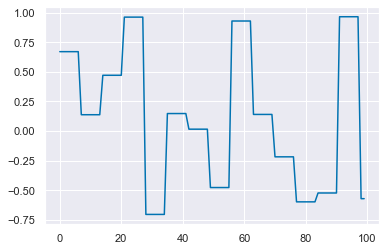

In [121]:
plt.plot(z)

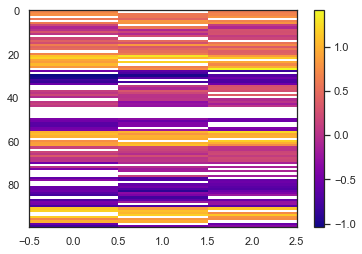

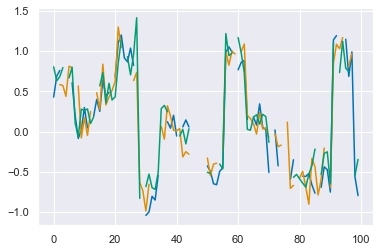

In [123]:
y3 = X1 + Xch
y3[~use_set] = np.nan
with sns.axes_style('white'):
    plt.imshow(y3, aspect='auto', interpolation='none', cmap='plasma')
    plt.colorbar()
    plt.show()
plt.plot(y3)
plt.show()
c3 = [
    MeanSquareSmall(size=T*p),
    make_columns_equal(ConstantChunks)(length=7)
]
p3 = Problem(y3, c3)

In [125]:
p3.decompose(how='cvx', reset=True)

                                     CVXPY                                     
                                    v1.1.18                                    
(CVXPY) Jan 27 03:01:49 PM: Your problem has 600 variables, 17 constraints, and 2 parameters.
(CVXPY) Jan 27 03:01:49 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 27 03:01:49 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Jan 27 03:01:49 PM: Compiling problem (target solver=OSQP).
(CVXPY) Jan 27 03:01:49 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) Jan 27 03:01:49 PM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 27 03:01:49 PM: Applying reduction Qp2SymbolicQ

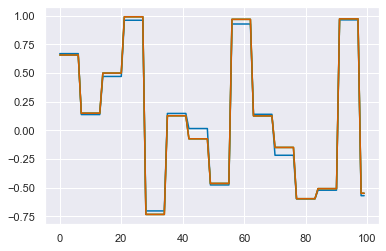

In [126]:
plt.plot(z)
plt.plot(p3.estimates[1])

In [127]:
p3.objective_value

0.017960785806042837

In [128]:
p3.decompose(how='admm', reset=True)

[====================] ...3 iterations, 0.01 sec -- obj_val: 2.21e-02, r: 4.88e-18, tol: 1.02e-05      



In [129]:
p3.objective_value

0.022122268461519937

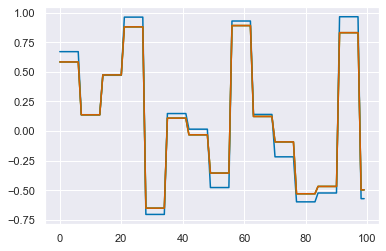

In [130]:
plt.plot(z)
plt.plot(p3.estimates[1])

In [131]:
p3.decompose(how='bcd', reset=True)

Starting BCD...
y shape: (100, 3)
X shape: (2, 100, 3)

[====================] ...2 iterations, 0.00 sec -- obj_val: 1.80e-02, r: 1.35e-18, tol: 1.02e-05      



In [132]:
p3.objective_value

0.017960785806042833

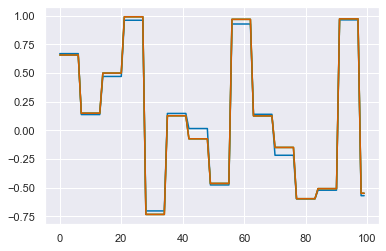

In [133]:
plt.plot(z)
plt.plot(p3.estimates[1])